In [1]:
import numpy as np
import pandas as pd
import os, sys
import seaborn as sns
import matplotlib.pyplot as plt
sys.path.append("./src/")
from convertor import convert
from preprocessing import get_target, preprocessing
from numpy.linalg import norm

In [2]:
plant_list = [
    "A.thaliana",
    "C.sinensis",
    "G.max",
    "G.raimondii",
    "M.truncatula",
    "O.sativa",
    "S.bicolor",
    "T.aestivum",
    "Z.mays"
]

In [3]:
data = {}
for plant in plant_list:
    df = pd.read_csv(f'./Experiment/{plant}/positive/Result/result_level1_filter.csv')
    df = convert(df)
    print(plant, df.shape)
    df = df[df['hit len'] < 25]
    print(plant, df.shape)
    [feature, mu, std]  = preprocessing(df,None,None,False)
    data[plant] = feature

A.thaliana (847, 183)
A.thaliana (834, 183)


/home/emadi/.local/lib/python3.8/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


C.sinensis (540, 183)
C.sinensis (540, 183)


/home/emadi/.local/lib/python3.8/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


G.max (1115, 183)
G.max (1111, 183)


/home/emadi/.local/lib/python3.8/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


G.raimondii (822, 183)
G.raimondii (822, 183)


/home/emadi/.local/lib/python3.8/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


M.truncatula (971, 183)
M.truncatula (971, 183)


/home/emadi/.local/lib/python3.8/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


O.sativa (1419, 183)
O.sativa (1415, 183)


/home/emadi/.local/lib/python3.8/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


S.bicolor (528, 183)
S.bicolor (528, 183)


/home/emadi/.local/lib/python3.8/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


T.aestivum (421, 183)
T.aestivum (421, 183)


/home/emadi/.local/lib/python3.8/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Z.mays (625, 183)
Z.mays (625, 183)


/home/emadi/.local/lib/python3.8/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [4]:
all = []
for plant in plant_list:
    all.append(data[plant]) 
df = pd.concat(all)
MAX = df.max()
MIN = df.min()

In [5]:
for plant in plant_list:
    data[plant] = (data[plant] - MIN) / (MAX - MIN)

In [6]:
for plant in plant_list:
    data[plant] = data[plant].mean()

In [7]:
rows = []
for plant in plant_list:
    rows.append(pd.Series(data[plant]))

In [8]:
data = pd.DataFrame(rows, plant_list)
#data = data.transpose()

In [9]:
from scipy.spatial import distance
n = len(plant_list)
sim = np.zeros((n,n), dtype=float)
for i in range(0, n):
    for j in range(0, n):
        v1 = data.loc[plant_list[i]]
        v2 = data.loc[plant_list[j]]            
        sim[i, j] = np.dot(v1, v2) / (norm(v1) * norm(v2))

In [10]:
sim = pd.DataFrame(sim, index=plant_list, columns= plant_list)

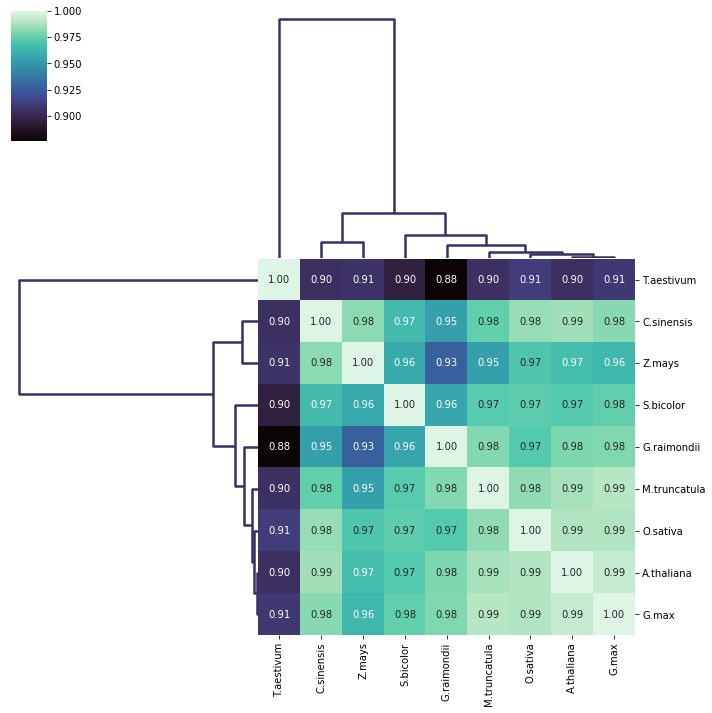

In [11]:
sns.clustermap(
    sim,
    cmap="mako",
    metric='correlation',
    figsize=(10, 10),                
    dendrogram_ratio=(.4, .4),    
    annot=True, 
    fmt=".2f",
    tree_kws=dict(linewidths=2.5, colors=(0.2, 0.2, 0.4))
)